# **Preparations**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score

In [ ]:
# constants
RC_PARAMS = {
    "figure.figsize" : (8,4),
    "font.size" : 10,
    "axes.titlesize" : 14,
    "axes.linewidth" : 1,
    "axes.titleweight" : "bold",
    "axes.titlecolor" : "black"
}

BBOX_PARAMS  = {
    "boxstyle" : "round",
    "pad" : 0.5,
    "facecolor" : "white",
    "edgecolor" : "black",
    "linewidth" : 1,
    "alpha" : 1
}

PATH_TRAIN_DATA = "train.csv"
PATH_TEST_DATA = "test.csv"

# Settings
plt.style.use("fivethirtyeight")
plt.rcParams.update(RC_PARAMS)

# **Load & info data**

In [ ]:
train_df = pd.read_csv(PATH_TRAIN_DATA).drop(columns=["id"])
test_df = pd.read_csv(PATH_TEST_DATA).drop(columns=["id"])

In [ ]:
print(train_df.shape)
train_df.head()

(593994, 12)


,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 54.4+ MB


# **EDA**

### Target rate

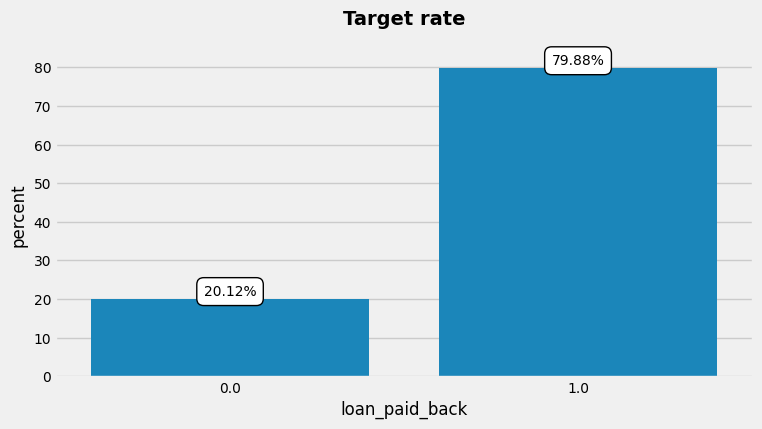

In [ ]:
target_countplot = sns.countplot(data=train_df, x="loan_paid_back", stat="percent")
target_countplot.bar_label(target_countplot.containers[0], fmt="%.2f%%", bbox=BBOX_PARAMS)

plt.title("Target rate", pad=20)
plt.show()

In [ ]:
train_df["loan_paid_back"].value_counts(normalize=True)

,proportion
loan_paid_back,
1.0,0.79882
0.0,0.20118


### Gini analysis numerical features

In [ ]:
gini_score_df = train_df\
    .select_dtypes(include=["int", "float"])\
    .drop(columns=["loan_paid_back"])\
    .apply(lambda col: roc_auc_score(train_df["loan_paid_back"], col))\
    .reset_index()\
    .set_axis(["feature", "gini_score"], axis=1)

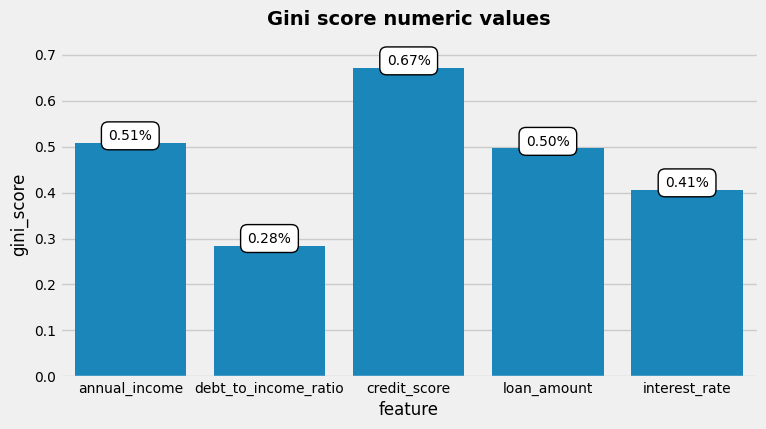

In [ ]:
gini_score_barplot = sns.barplot(data=gini_score_df, x="feature", y="gini_score")
gini_score_barplot.bar_label(gini_score_barplot.containers[0], fmt="%.2f%%", bbox=BBOX_PARAMS)

plt.title("Gini score numeric values", pad=20)
plt.show()

In [ ]:
gini_score_df

,feature,gini_score
0,annual_income,0.508128
1,debt_to_income_ratio,0.284730
2,credit_score,0.671153
3,loan_amount,0.496043
4,interest_rate,0.405829


1. Признак credit_score хорошо разделяет целевую переменную — чем выше значение, тем выше вероятность возврата кредита.
2. Признак debt_to_income_ratio также информативен, но действует в обратную сторону: при его росте вероятность возврата снижается.
3. Остальные признаки практически не могут самостоятельно различать классы
---
1. The credit_score feature separates the target variable well — the higher the value, the higher the probability of loan repayment.
2. The debt_to_income_ratio feature is also informative, but it works in the opposite direction: as it increases, the probability of repayment decreases.
3. The remaining features are almost incapable of distinguishing between classes on their own.

### Target rate categorical features

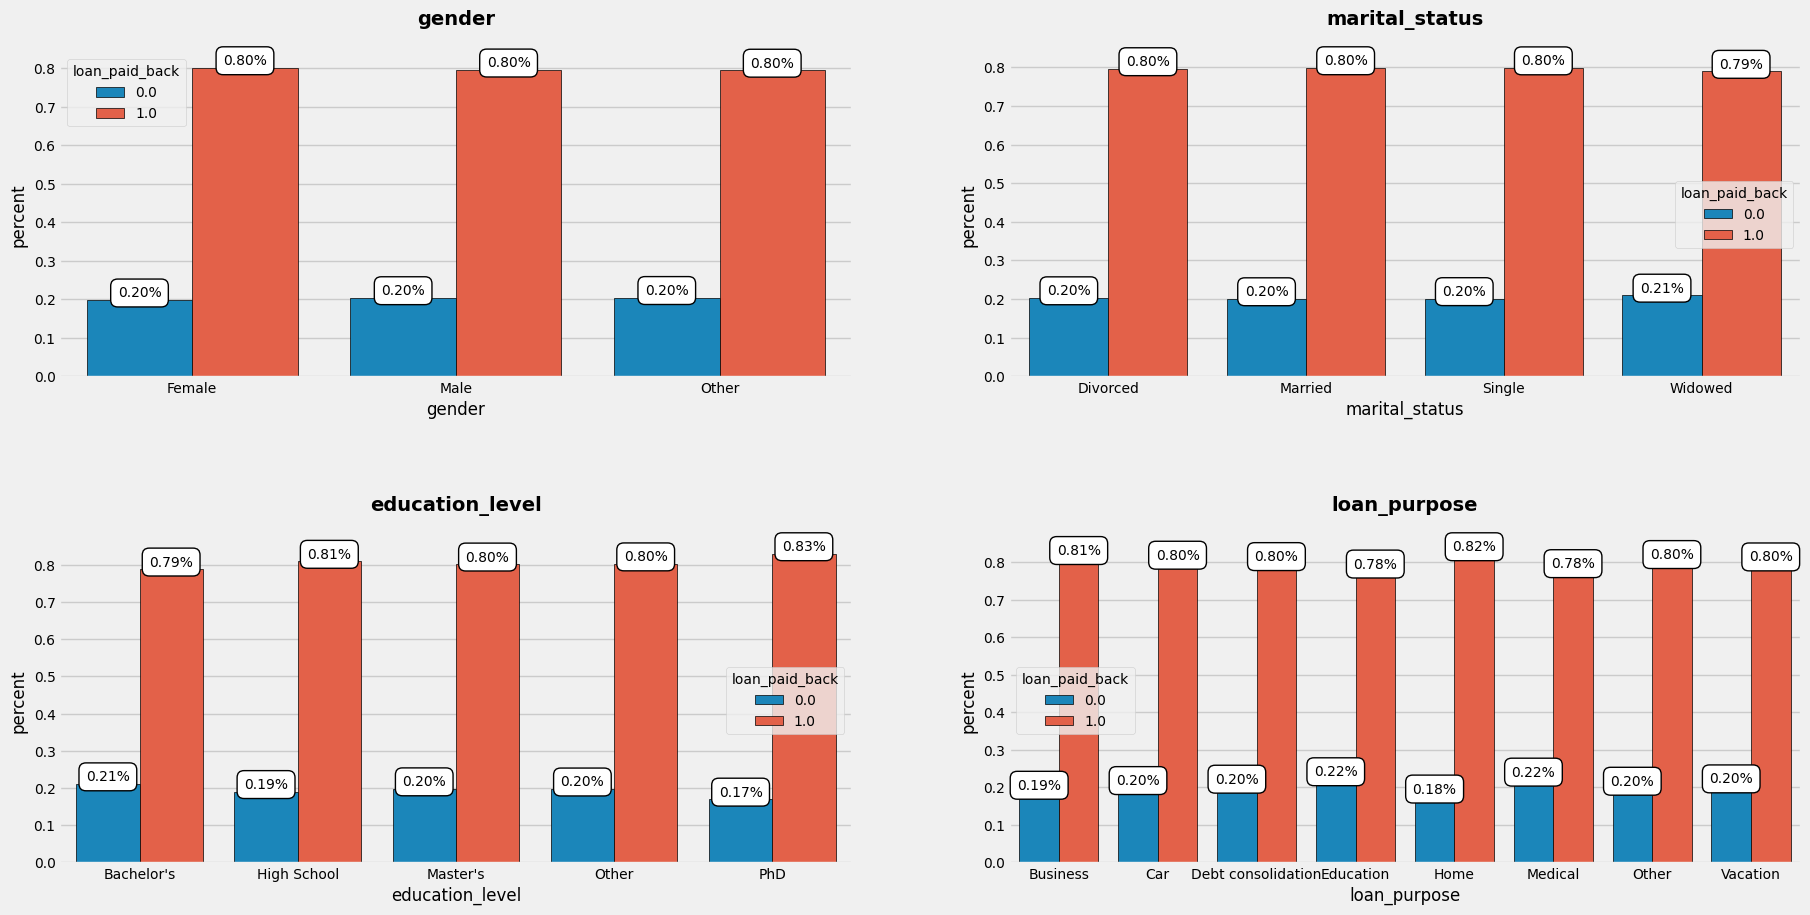

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)

for index, col in enumerate(["gender", "marital_status", "education_level", "loan_purpose"]):
    i, j = index // 2, index % 2
    plot_df = train_df.groupby(col)["loan_paid_back"].value_counts(normalize=True).rename("percent").reset_index()

    sns.barplot(data=plot_df, x=col, y="percent", hue="loan_paid_back", edgecolor="black", ax=axes[i,j])
    axes[i,j].bar_label(axes[i,j].containers[0], fmt="%.2f%%", bbox=BBOX_PARAMS)
    axes[i,j].bar_label(axes[i,j].containers[1], fmt="%.2f%%", bbox=BBOX_PARAMS)

    axes[i,j].set_title(col, pad=20)

plt.show()

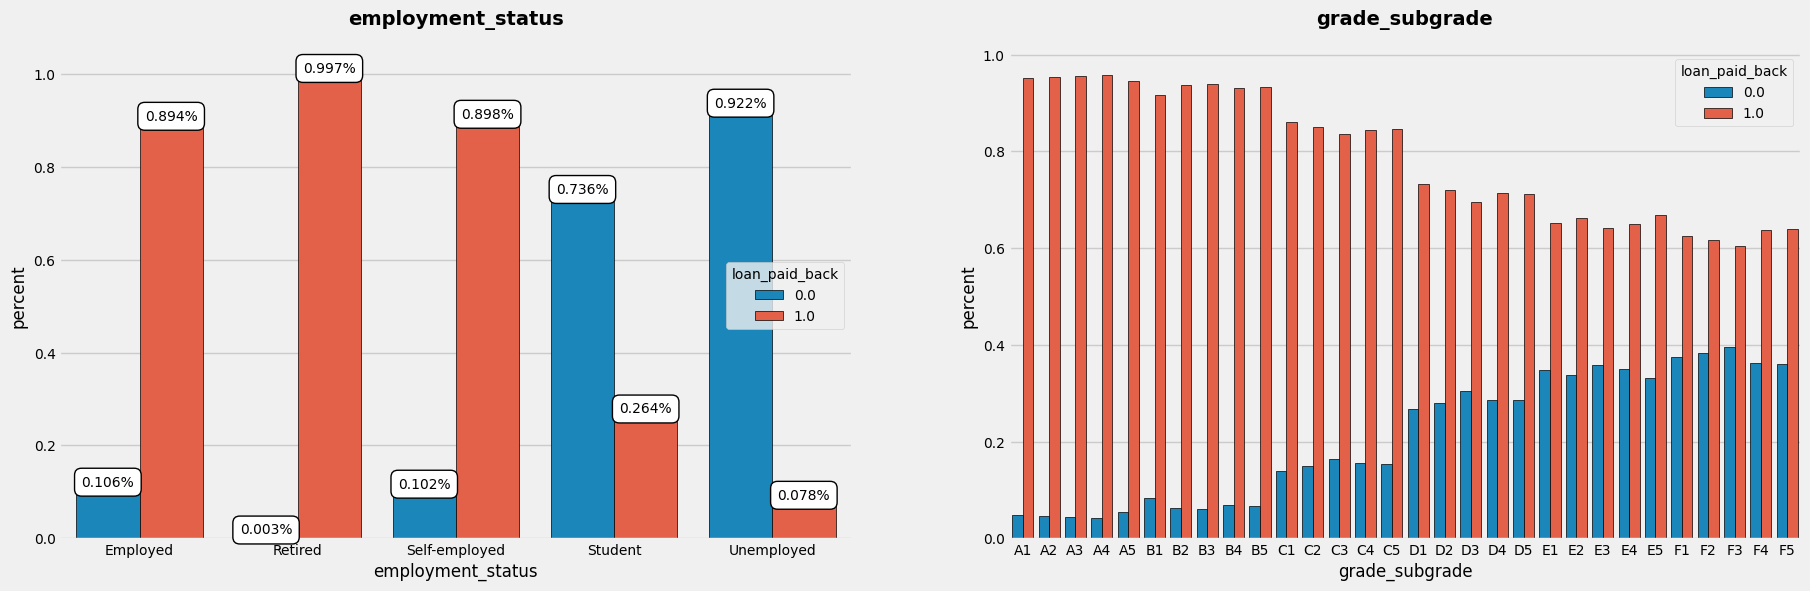

In [ ]:
# settings plot
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# employment_status plot
plot_df = train_df.groupby("employment_status")["loan_paid_back"].value_counts(normalize=True).rename("percent").reset_index()

sns.barplot(data=plot_df, x="employment_status", y="percent", hue="loan_paid_back", edgecolor="black", ax=axes[0])
axes[0].bar_label(axes[0].containers[0], fmt="%.3f%%", bbox=BBOX_PARAMS)
axes[0].bar_label(axes[0].containers[1], fmt="%.3f%%", bbox=BBOX_PARAMS)
axes[0].set_title("employment_status", pad=20)

# grade_subgrade plot
plot_df = train_df.groupby("grade_subgrade")["loan_paid_back"].value_counts(normalize=True).rename("percent").reset_index()

sns.barplot(data=plot_df, x="grade_subgrade", y="percent", hue="loan_paid_back", edgecolor="black", ax=axes[1])
axes[1].set_title("grade_subgrade", pad=20)

plt.show()

### Information value (IV) in categorical features

In [ ]:
def calc_information_value(df: pd.DataFrame, feature: str, target: str) -> pd.DataFrame:
    """
    Calculation Information Value (IV).
    :param df: pandas data frame.
    :param feature: name feature.
    :param target: name target.
    :return: pandas data frame.
    """
    data = df.groupby(feature)[target].agg(['count', 'sum'])
    data.columns = ['total', 'bads']
    data['goods'] = data['total'] - data['bads']

    total_goods = data['goods'].sum()
    total_bads = data['bads'].sum()

    data['dist_good'] = data['goods'] / total_goods
    data['dist_bad'] = data['bads'] / total_bads

    data['woe'] = np.log(data['dist_good'] / data['dist_bad'])

    data['iv_component'] = (data['dist_good'] - data['dist_bad']) * data['woe']

    iv = data['iv_component'].sum()
    data = data[['goods', 'bads', 'dist_good', 'dist_bad', 'woe', 'iv_component']].sort_values('woe')

    return iv, data

In [ ]:
information_value_dict = {}

for cat_col in train_df.select_dtypes(include=["object"]).columns.tolist():
    iv_value, _ = calc_information_value(train_df, cat_col, "loan_paid_back")
    information_value_dict[cat_col] = iv_value

iv_df = pd.DataFrame(list(information_value_dict.items()), columns=["feature", "IV"])

In [ ]:
iv_df

,feature,IV
0,gender,0.000344
1,marital_status,0.000043
2,education_level,0.004061
3,employment_status,2.517845
4,loan_purpose,0.004132
5,grade_subgrade,0.351853


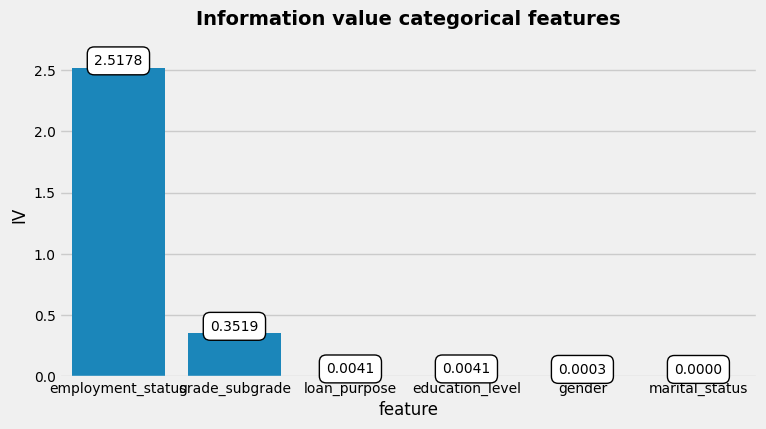

In [ ]:
iv_barplot = sns.barplot(data=iv_df.sort_values(by="IV", ascending=False), x="feature", y="IV")
iv_barplot.bar_label(iv_barplot.containers[0], fmt="%.4f", bbox=BBOX_PARAMS)

plt.title("Information value categorical features", pad=20)
plt.show()

    Less than 0.02	--- Not useful for prediction
    0.02 to 0.1	--- Weak predictive Power
    0.1 to 0.3	--- Medium predictive Power
    0.3 to 0.5	--- Strong predictive Power
    >0.5	--- Suspicious Predictive Power

1. employment_status имеет сильную предсказательную силу. Students и Unemployed дают повышенный риск невозврата, тогда как Employed, Self-employed и особенно Retired значительно чаще возвращают кредит.
2. grade_subgrade- чем хуже субгрейд (от A к F), тем выше доля невозвратов. Признак даёт чёткий монотонный рост риска и хорошо разделяет классы.
3. Остальные признаки самостоятельно слабо разделяют классы
---
1. employment_status has a strong predictive power. Students and Unemployed have an increased risk of non-repayment, while Employed, Self-employed, and especially Retired are significantly more likely to repay the loan.
2. grade_subgrade- the worse the subgrade (from A to F), the higher the percentage of non-repayments. This feature provides a clear monotonic increase in risk and effectively separates the classes.
3. The remaining features have limited ability to separate the classes independently.

### PSI index

In [ ]:
def psi_calculate(
    train_s: pd.Series,
    test_s: pd.Series,
    bins: list,
    eps: float = 1e-6
) -> float:
    """
    Compute PSI (Population Stability Index) for a selected feature.
    :param train_s: Series with baseline (train) data.
    :param test_s: Series with current (test) data.
    :param bins: List of bin edges for discretization.
    :param column: Feature name to evaluate.
    :param eps: Small value to avoid division by zero.
    :return: PSI value for the feature.
    """
    train_values = pd.cut(train_s, bins).value_counts(normalize=True)
    test_values = pd.cut(test_s, bins).value_counts(normalize=True)

    merge_df = pd.merge(train_values, test_values, right_index=True, left_index=True)
    merge_df.columns = ["proportion_train", "proportion_test"]

    A_group = merge_df["proportion_train"].clip(lower=eps)
    B_group = merge_df["proportion_test"].clip(lower=eps)

    psi_values = (A_group - B_group) * np.log(A_group / B_group)
    psi_values = psi_values.sum() * 100

    return psi_values

In [ ]:
psi_dict = {}

for col in train_df.select_dtypes(include=["float", "int"]).columns:
    if col != "loan_paid_back":
        bins = [-np.inf] + np.linspace(train_df[col].min(), train_df[col].max(), 101).tolist() + [np.inf]
        psi = psi_calculate(train_df[col], test_df[col], bins)

        psi_dict[col] = psi

psi_df = pd.DataFrame(list(psi_dict.items()), columns=["feature", "PSI"])

In [ ]:
psi_df

,feature,PSI
0,annual_income,0.044137
1,debt_to_income_ratio,0.051344
2,credit_score,0.046100
3,loan_amount,0.048721
4,interest_rate,0.056345


```
PSI < 0.1 — изменений нет / стабильность нормальная
0.1 ≤ PSI < 0.25 — умеренные изменения / возможный дрейф
PSI ≥ 0.25 — существенный дрейф / нестабильность
```
---
```
PSI < 0.1 — no changes / normal stability
0.1 ≤ PSI < 0.25 — moderate changes / possible drift
PSI ≥ 0.25 — significant drift / instability
```

- Числовые признаки стабильны
---
- Numerical features are stable

### Stability categorical features

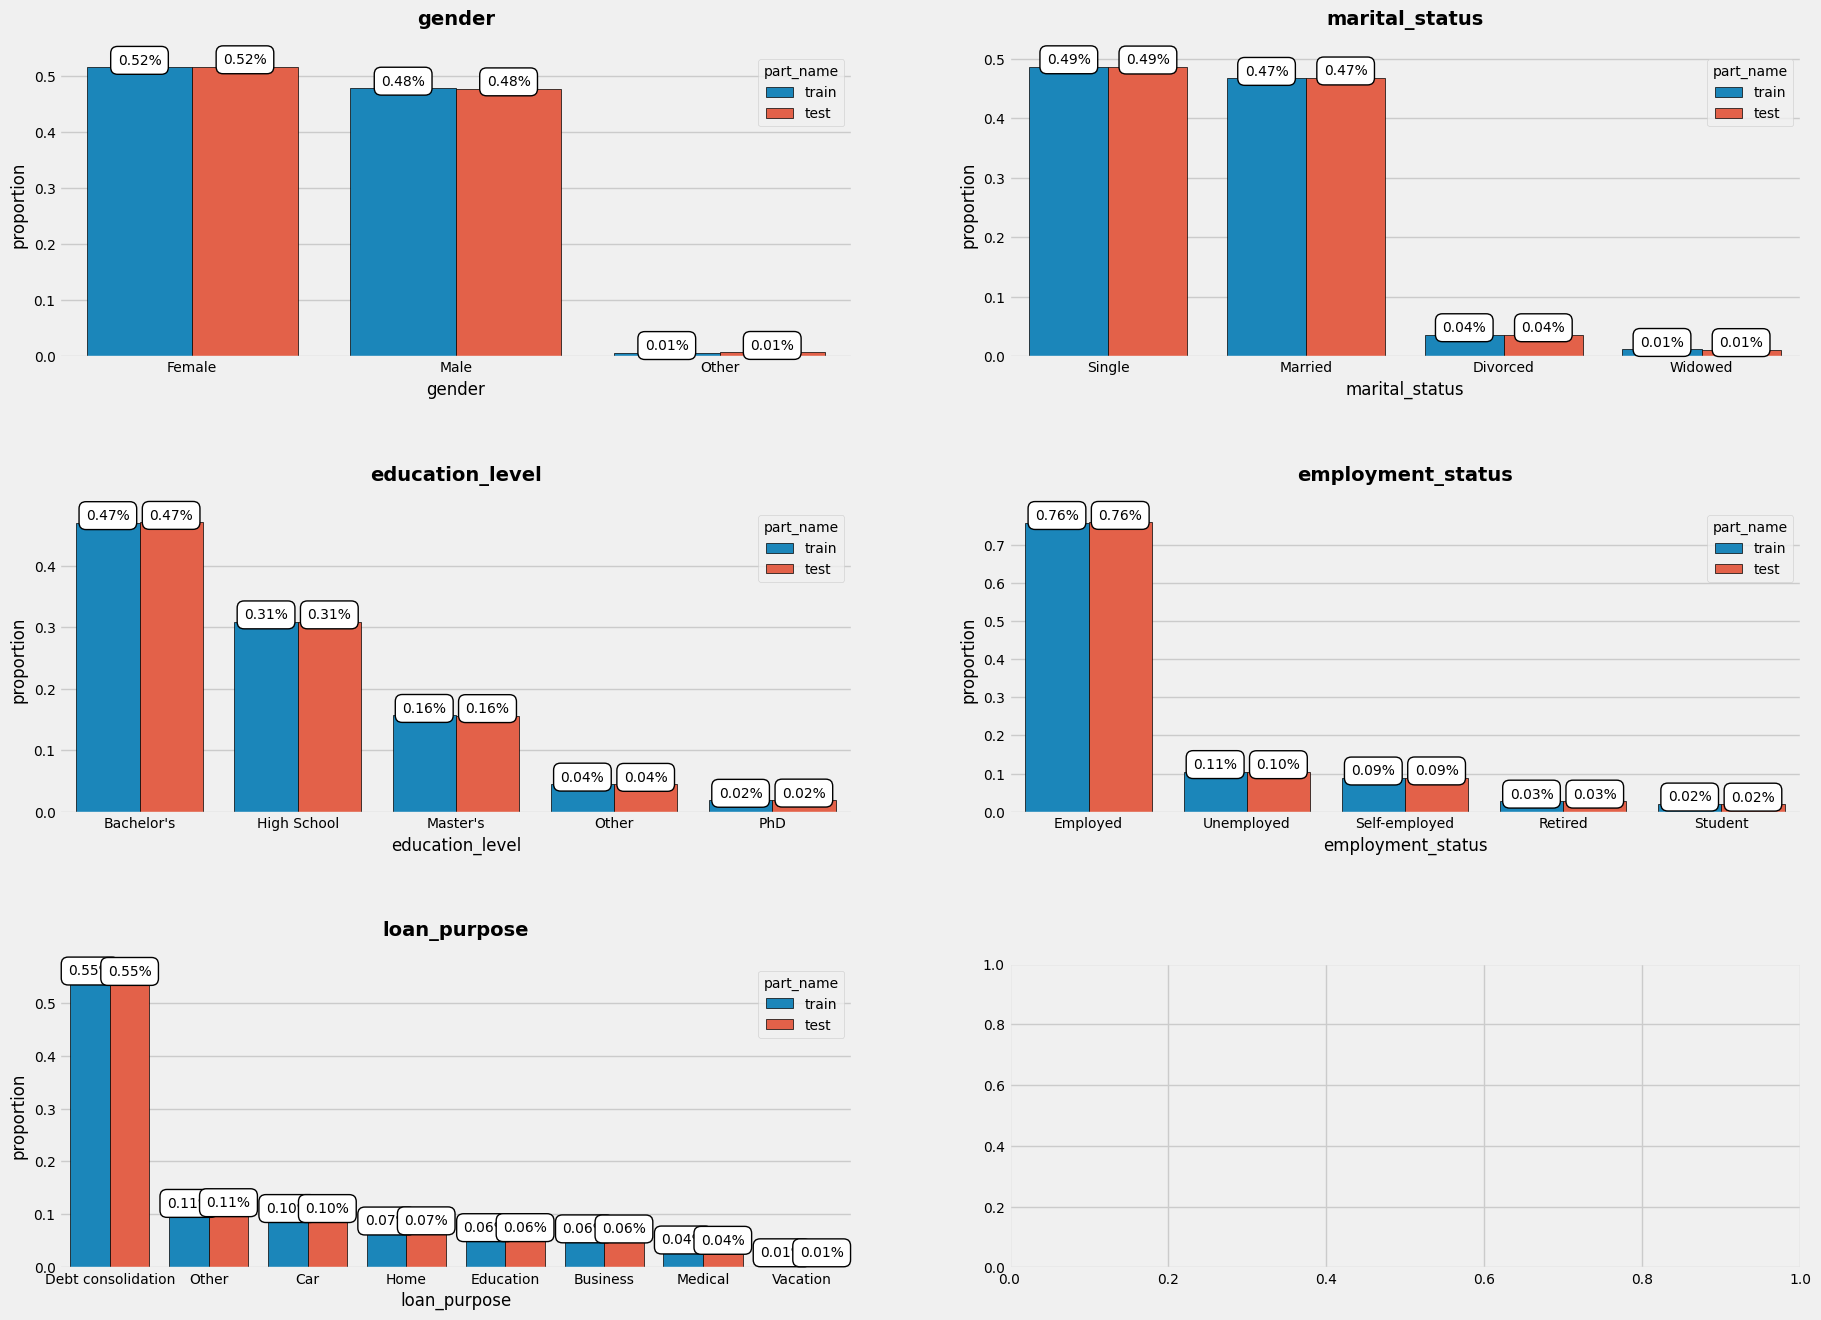

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

for index, col in enumerate(["gender", "marital_status", "education_level", "employment_status", "loan_purpose"]):
    i, j = index // 2, index % 2
    rate_df = pd.concat([
        train_df[col].value_counts(normalize=True).reset_index().assign(part_name="train"),
        test_df[col].value_counts(normalize=True).reset_index().assign(part_name="test")
    ], ignore_index=True)

    sns.barplot(data=rate_df, x=col, y="proportion", hue="part_name", edgecolor="black", ax=axes[i,j])
    axes[i,j].bar_label(axes[i,j].containers[0], fmt="%.2f%%", bbox=BBOX_PARAMS)
    axes[i,j].bar_label(axes[i,j].containers[1], fmt="%.2f%%", bbox=BBOX_PARAMS)

    axes[i,j].set_title(col, pad=20)

plt.show()

In [ ]:
df = pd.merge(
    train_df["grade_subgrade"].value_counts(normalize=True),
    test_df["grade_subgrade"].value_counts(normalize=True),
    right_index=True,
    left_index=True
)

df["diff"] = df["proportion_y"] - df["proportion_x"]

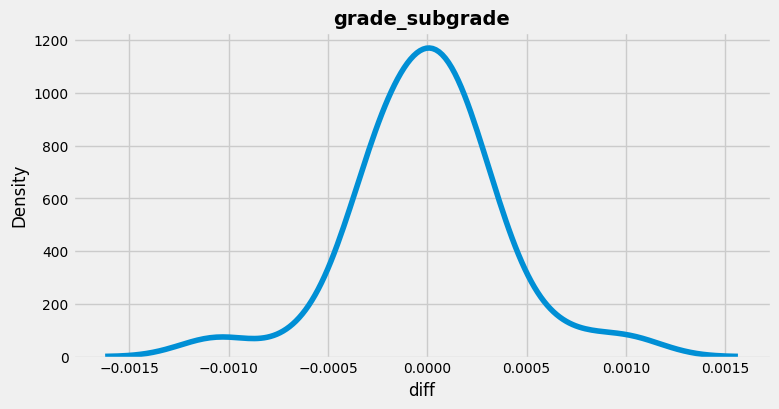

In [ ]:
sns.kdeplot(df["diff"])

plt.title("grade_subgrade")
plt.show()

1. Распределение долей категорий в train и test совпадает — состав классов в обеих выборках одинаковый, без смещений. Признаки стабильны
---
1. The distribution of category proportions in train and test is the same — the class composition in both samples is the same, with no biases. The features are stable